In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [7]:
encoding_dim = 16 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(units=256, activation='relu')(input_img)
encoded = Dense(units=32, activation='relu')(encoded)
encoded = Dense(units=encoding_dim, activation='relu')(encoded)
# decoded representation of code 
decoded_ip = Input(shape=(encoding_dim,))
decoded = Dense(units=32, activation='relu')(decoded_ip)
decoded = Dense(units=256, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
# Model which take input image and shows decoded images
encoder = Model(input_img, encoded)
decoder = Model(decoded_ip, decoded)
latent_vector = encoder(input_img)
output = decoder(latent_vector)
autoencoder = Model(input_img, output)

In [8]:
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=64,
                validation_data=(x_test, x_test))

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0384 - val_loss: 0.0230
Epoch 2/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0202 - val_loss: 0.0181
Epoch 3/15
938/938 [==============================] - 3s 4ms/step - loss: 0.0173 - val_loss: 0.0160
Epoch 4/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 5/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 6/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 7/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 8/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 9/15
938/938 [==============================] - 5s 6ms/step - loss: 0.0128 - val_loss: 0.0125
Epoch 10/15
938/938 [==============================] - 3s 4ms/step - loss: 0.0125 - val_loss: 0.0124

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(loss_hist)
plt.show()

In [12]:
encoded_img = encoder.predict(x_test)

313/313 [==============================] - 0s 987us/step


In [13]:
decoded_img = decoder.predict(encoded_img)

313/313 [==============================] - 0s 1ms/step


In [14]:
decoded_img.shape

(10000, 784)

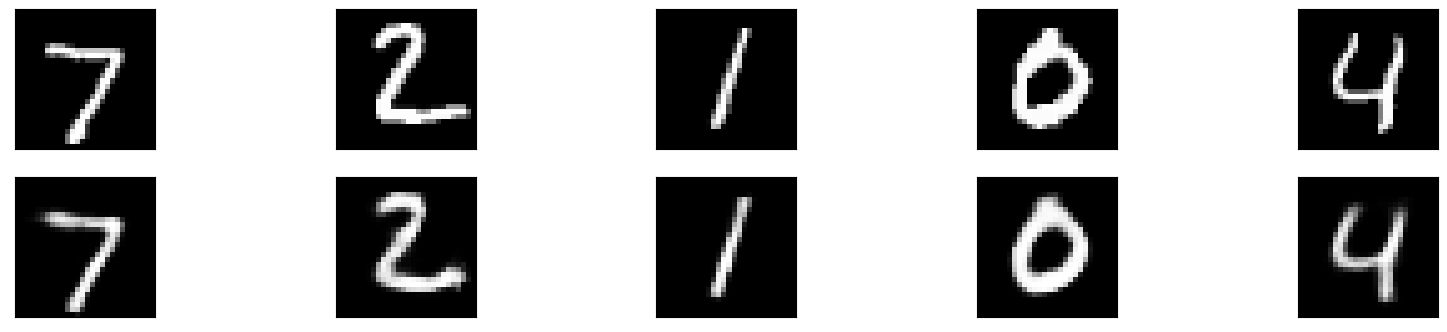

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
#preparing test embeddings

train_encoded = encoder(x_train)
test_encoded = encoder(x_test)
test_labels = y_test
print(test_encoded.shape)
print(train_encoded.shape)

(10000, 16)
(60000, 16)


In [17]:
from sklearn.svm import SVC
clf =  SVC(gamma='auto')

clf.fit(train_encoded,y_train)
pred_labels = clf.predict(test_encoded)

In [18]:
print(clf)

SVC(gamma='auto')


*** Classification Report ***
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       980
           1       1.00      0.95      0.97      1135
           2       0.44      0.99      0.61      1032
           3       0.91      0.89      0.90      1010
           4       0.98      0.80      0.88       982
           5       0.98      0.73      0.84       892
           6       1.00      0.83      0.91       958
           7       1.00      0.80      0.89      1028
           8       0.98      0.79      0.87       974
           9       0.97      0.83      0.89      1009

    accuracy                           0.85     10000
   macro avg       0.93      0.85      0.87     10000
weighted avg       0.92      0.85      0.87     10000



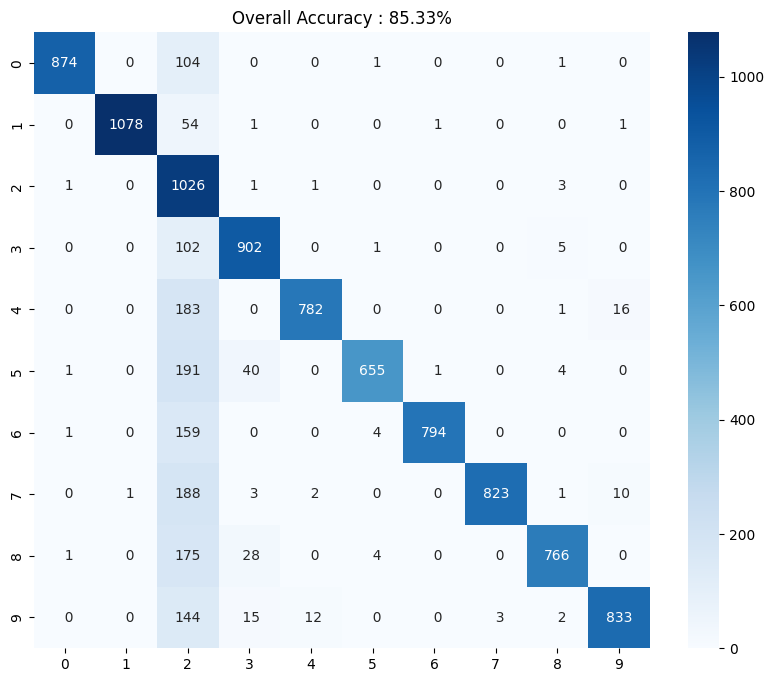

Classwise Accuracy Score: 

	0	1	2	3	4	5	6	7	8	9
	89.18	94.98	99.42	89.31	79.63	73.43	82.88	80.06	78.64	82.56

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

print('*** Classification Report ***')
print(classification_report(test_labels,pred_labels))
overallAccuracy = accuracy_score(test_labels,pred_labels)
cm = confusion_matrix(test_labels,pred_labels)
classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

plt.figure(figsize=(10, 8))
plt.title('Overall Accuracy : {0:3.2f}%'.format(overallAccuracy*100), size=12)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues',fmt='3.0f')

plt.show()

print('Classwise Accuracy Score: \n')

for i in range(10):
    print(f'\t{i}', end='')
print()
for acc in classwiseAccuracy:
    print(f'\t{acc*100:2.2f}', end='')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


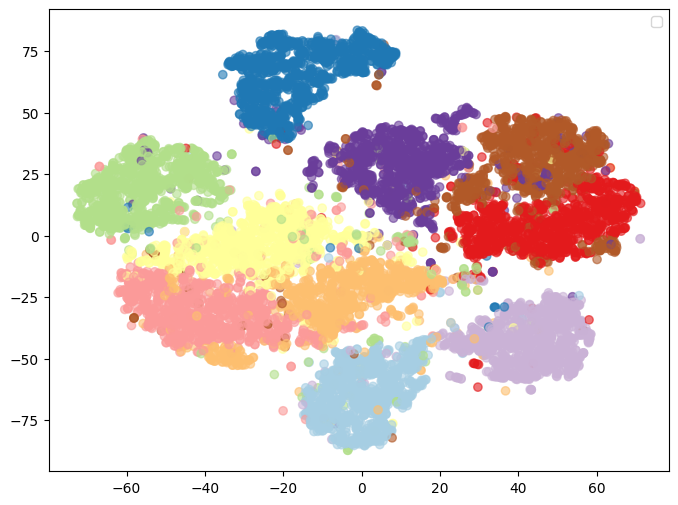

In [21]:
from sklearn.manifold import TSNE

plt.figure(figsize=(8, 6))
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=40).fit_transform(test_encoded)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=test_labels,cmap="Paired", alpha = 0.6,marker='o')
plt.legend()
plt.show()

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

## Function to Scale and visualize the embedding vectors
def plot_embedding(X,y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure(figsize=(12,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 20e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(x_test[i].reshape(28,28), cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


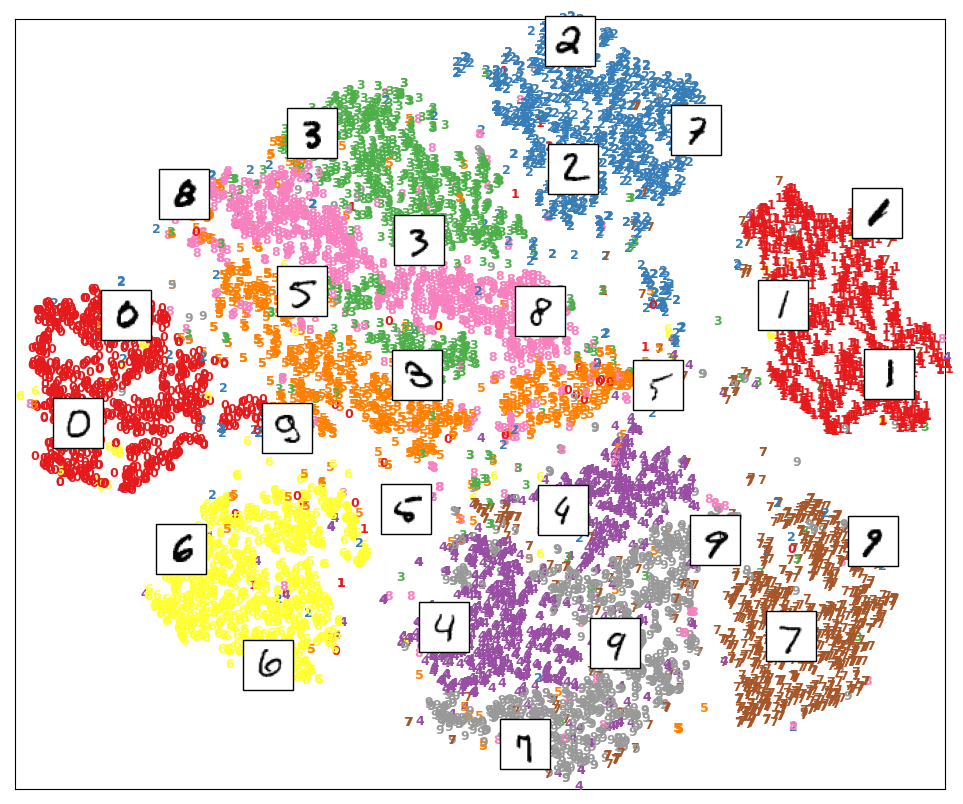

In [ ]:
plot_embedding(X_embedded,test_labels)

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))


In [ ]:
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 73s 154ms/step - loss: 0.1275 - val_loss: 0.0810
Epoch 2/15
469/469 [==============================] - 84s 179ms/step - loss: 0.0790 - val_loss: 0.0761
Epoch 3/15
469/469 [==============================] - 70s 150ms/step - loss: 0.0755 - val_loss: 0.0745
Epoch 4/15
469/469 [==============================] - 58s 124ms/step - loss: 0.0736 - val_loss: 0.0723
Epoch 5/15
469/469 [==============================] - 59s 126ms/step - loss: 0.0724 - val_loss: 0.0714
Epoch 6/15
469/469 [==============================] - 59s 126ms/step - loss: 0.0715 - val_loss: 0.0705
Epoch 7/15
469/469 [==============================] - 70s 149ms/step - loss: 0.0708 - val_loss: 0.0701
Epoch 8/15
469/469 [==============================] - 74s 158ms/step - loss: 0.0702 - val_loss: 0.0696
Epoch 9/15
469/469 [==============================] - 67s 142ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 10/15
469/469 [==============================] - 65s 139ms/step - l

In [ ]:
pred = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


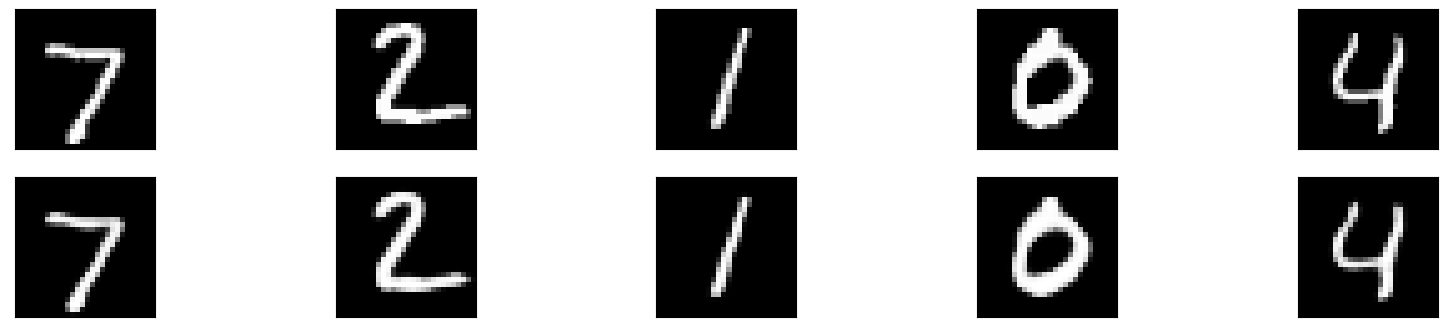

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### introduce noise in the images

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

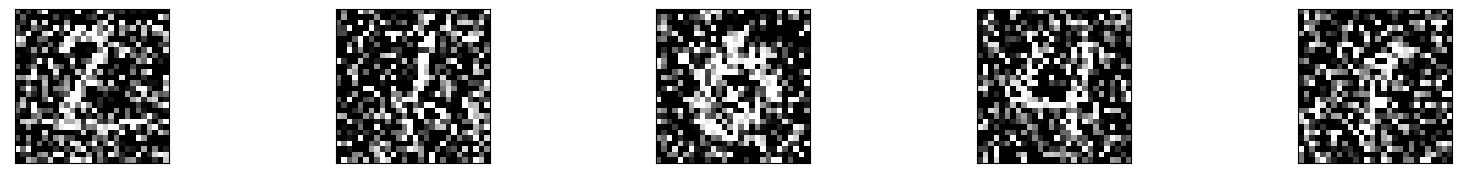

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 76s 158ms/step - loss: 0.1980 - val_loss: 0.1485
Epoch 2/15
469/469 [==============================] - 74s 158ms/step - loss: 0.1449 - val_loss: 0.1398
Epoch 3/15
469/469 [==============================] - 71s 152ms/step - loss: 0.1384 - val_loss: 0.1346
Epoch 4/15
469/469 [==============================] - 71s 151ms/step - loss: 0.1347 - val_loss: 0.1320
Epoch 5/15
469/469 [==============================] - 71s 151ms/step - loss: 0.1323 - val_loss: 0.1305
Epoch 6/15
469/469 [==============================] - 70s 150ms/step - loss: 0.1304 - val_loss: 0.1282
Epoch 7/15
469/469 [==============================] - 76s 161ms/step - loss: 0.1288 - val_loss: 0.1270
Epoch 8/15
469/469 [==============================] - 85s 181ms/step - loss: 0.1277 - val_loss: 0.1260
Epoch 9/15
469/469 [==============================] - 73s 155ms/step - loss: 0.1268 - val_loss: 0.1252
Epoch 10/15
469/469 [==============================] - 71s 152ms/step - l

In [ ]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 8s 25ms/step


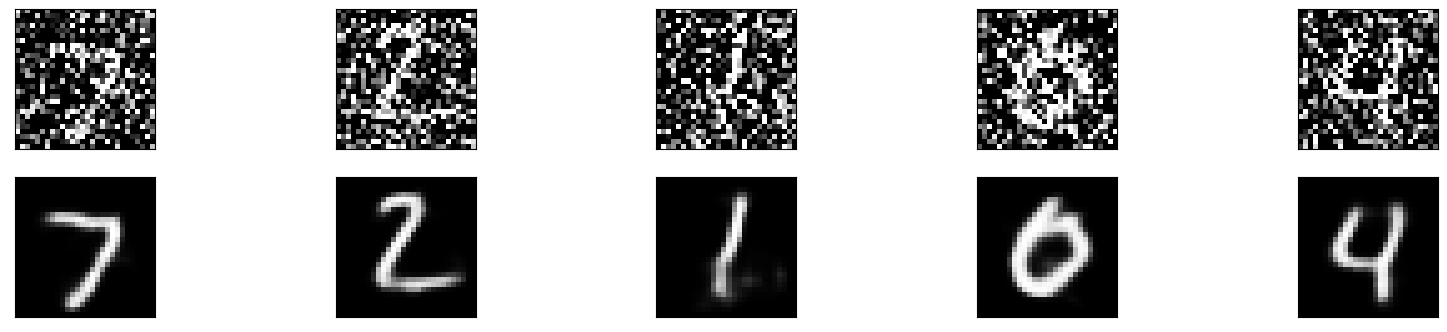

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()